In [36]:
import datetime
import numpy as np
import pandas as pd
import quandl, math
import pandas_datareader.data as web
from  sklearn.model_selection  import  cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

In [37]:
style.use('ggplot')

In [38]:

start = datetime.datetime(2014, 12, 31)
end = datetime.datetime(2019, 1, 3)
# 台灣股市的話要用 股票代號 加上 .TW
df_1526 = web.DataReader('4190.TW', 'yahoo', start, end)

In [39]:
df_1526.tail(14)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-13,101.0,97.800003,99.400002,101.000000,1031204.0,101.000000
2018-12-14,101.5,98.199997,101.000000,100.500000,646001.0,100.500000
2018-12-17,102.0,99.099998,99.300003,99.500000,589057.0,99.500000
2018-12-18,101.0,97.099998,99.000000,98.000000,488000.0,98.000000
2018-12-19,101.5,99.199997,100.000000,99.199997,848012.0,99.199997
2018-12-20,101.5,97.300003,99.300003,101.500000,831264.0,101.500000
2018-12-21,103.5,99.599998,101.000000,100.500000,949020.0,100.500000
2018-12-24,105.5,101.500000,101.500000,104.000000,1438660.0,104.000000
2018-12-25,104.5,101.500000,102.000000,101.500000,900000.0,101.500000


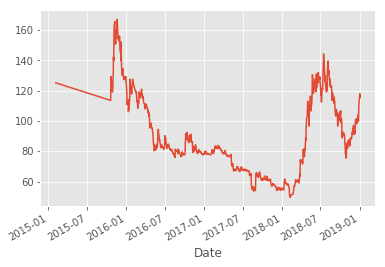

In [40]:
df_1526['Adj Close'].plot()
plt.show()

In [41]:
forecast = int(math.ceil(0.01 * len(df_1526)))

In [42]:
forecast_df_1526 = df_1526[-forecast:]

In [43]:
forecast_df_1526.shape

(8, 6)

In [44]:
a1526_df = df_1526[:-forecast]

In [45]:
a1526_df.shape

(778, 6)

In [46]:
X = np.array(a1526_df.drop(['Adj Close'], 1))

In [47]:
y = np.array(a1526_df['Adj Close'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [50]:
confidence = clf.score(X_test, y_test)
print(confidence)

0.9936116006258122


In [51]:
f_X=np.array(forecast_df_1526.drop(['Adj Close'], 1))
forecast_set = clf.predict(f_X)

In [52]:
a1526_df['Forecast'] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
last_date = a1526_df.iloc[-1].name

In [54]:
last_unix = last_date.timestamp()

In [55]:
one_day = 86400

In [56]:
next_unix = last_unix + one_day

In [57]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    a1526_df.loc[next_date] = [np.nan for _ in range(len(a1526_df.columns)-1)]+[i+14]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
a1526_df.head()

,High,Low,Open,Close,Volume,Adj Close,Forecast
Date,,,,,,,
2015-02-05,134.123993,134.123993,134.123993,134.123993,0.0,125.198349,NaN
2015-10-21,121.658997,104.706001,108.695000,121.658997,4868628.0,113.562874,NaN
2015-10-22,143.597000,118.667000,122.655998,138.610992,3865821.0,129.386749,NaN
2015-10-23,142.600006,132.128998,138.610992,135.619003,2191133.0,126.593872,NaN
2015-10-26,141.104004,134.621994,137.613998,134.621994,1327716.0,125.663216,NaN


In [59]:
a1526_df.tail(14)

,High,Low,Open,Close,Volume,Adj Close,Forecast
Date,,,,,,,
2018-12-13 00:00:00,101.0,97.800003,99.400002,101.000000,1031204.0,101.000000,NaN
2018-12-14 00:00:00,101.5,98.199997,101.000000,100.500000,646001.0,100.500000,NaN
2018-12-17 00:00:00,102.0,99.099998,99.300003,99.500000,589057.0,99.500000,NaN
2018-12-18 00:00:00,101.0,97.099998,99.000000,98.000000,488000.0,98.000000,NaN
2018-12-19 00:00:00,101.5,99.199997,100.000000,99.199997,848012.0,99.199997,NaN
2018-12-20 00:00:00,101.5,97.300003,99.300003,101.500000,831264.0,101.500000,NaN
2018-12-21 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,110.137507
2018-12-22 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,113.763882
2018-12-23 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,111.004507


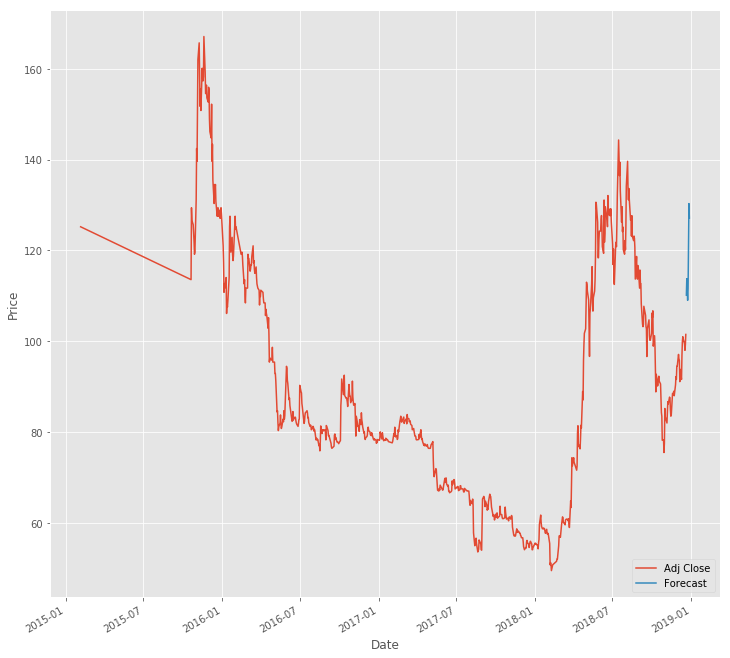

In [60]:
fig = plt.figure(figsize = (12,12))
a1526_df['Adj Close'].plot()
a1526_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()